In [15]:
import pandas as pd
import sqlite3
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import OneHotEncoder


db_path = 'data.db'
connection = sqlite3.connect(db_path)

queryTrain = "SELECT * FROM teams WHERE year < 10 ORDER BY year"
train_data = pd.read_sql_query(queryTrain, connection)

queryTest = "SELECT * FROM teams WHERE year = 10"
test_data = pd.read_sql_query(queryTest, connection)

# Define your features (X) and target (y) for training data
X_train = train_data.drop(columns=['playoff', 'lgID', 'tmID', 'franchID','confID','divID', 'seeded', 'semis','finals','name', 'firstRound', 'arena', 'rank'])  # Exclude non-feature columns
y_train = train_data['playoff']  # Your target variable

# Define your features (X) and target (y) for test data
X_test = test_data.drop(columns=['playoff', 'lgID', 'tmID', 'franchID','confID','divID', 'seeded', 'semis','finals','name', 'firstRound', 'arena', 'rank'])  # Exclude non-feature columns
y_test = test_data['playoff']  # Your target variable

# Create a Decision Tree classifier
clf = DecisionTreeClassifier(random_state=0)

# Fit the classifier on the training data
clf.fit(X_train, y_train)

# Make predictions on the test data
y_pred = clf.predict(X_test)

#print(tree.export_text(clf))
""" print(X_train.columns)
print(X_train['homeL'])
 """
print(tree.export_text(clf))

# Calculate accuracy on the test data
accuracy = accuracy_score(y_test, y_pred)

# Print the accuracy
print(f"Accuracy: {accuracy: .2f}")

print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)



|--- feature_37 <= 16.50
|   |--- feature_45 <= 9.50
|   |   |--- feature_8 <= 600.50
|   |   |   |--- class: N
|   |   |--- feature_8 >  600.50
|   |   |   |--- class: Y
|   |--- feature_45 >  9.50
|   |   |--- feature_27 <= 317.50
|   |   |   |--- class: N
|   |   |--- feature_27 >  317.50
|   |   |   |--- class: Y
|--- feature_37 >  16.50
|   |--- feature_19 <= 719.50
|   |   |--- feature_45 <= 12.50
|   |   |   |--- class: Y
|   |   |--- feature_45 >  12.50
|   |   |   |--- feature_21 <= 486.50
|   |   |   |   |--- class: N
|   |   |   |--- feature_21 >  486.50
|   |   |   |   |--- class: Y
|   |--- feature_19 >  719.50
|   |   |--- feature_37 <= 19.00
|   |   |   |--- feature_18 <= 632.50
|   |   |   |   |--- class: N
|   |   |   |--- feature_18 >  632.50
|   |   |   |   |--- class: Y
|   |   |--- feature_37 >  19.00
|   |   |   |--- class: Y

Accuracy:  0.69
              precision    recall  f1-score   support

           N       0.56      1.00      0.71         5
           Y  

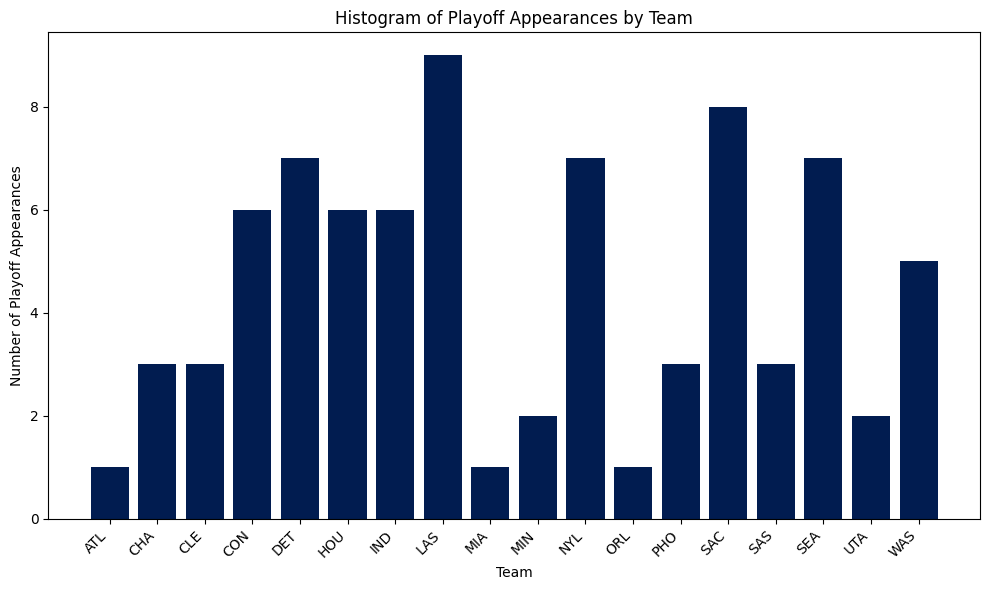

Text(0, 0.5, 'Count')

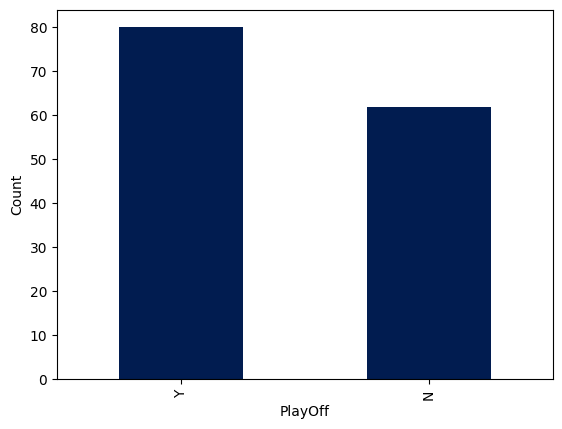

In [16]:
import matplotlib.pyplot as plt

df = pd.read_csv("./Dataset/teams.csv")

# Assuming 'df' is your DataFrame
# Select the relevant columns
playoff_data = df[['year', 'tmID', 'playoff']]

# Filter only rows where 'playoff' is 'Y' for playoff appearance
playoff_teams = playoff_data[playoff_data['playoff'] == 'Y']

# Group by 'tmID' and count the number of playoff appearances
playoff_counts = playoff_teams.groupby('tmID').size()

# Plotting the histogram
plt.figure(figsize=(10, 6))
plt.bar(playoff_counts.index, playoff_counts.values, color='#011C50')
plt.xlabel('Team')
plt.ylabel('Number of Playoff Appearances')
plt.title('Histogram of Playoff Appearances by Team')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()





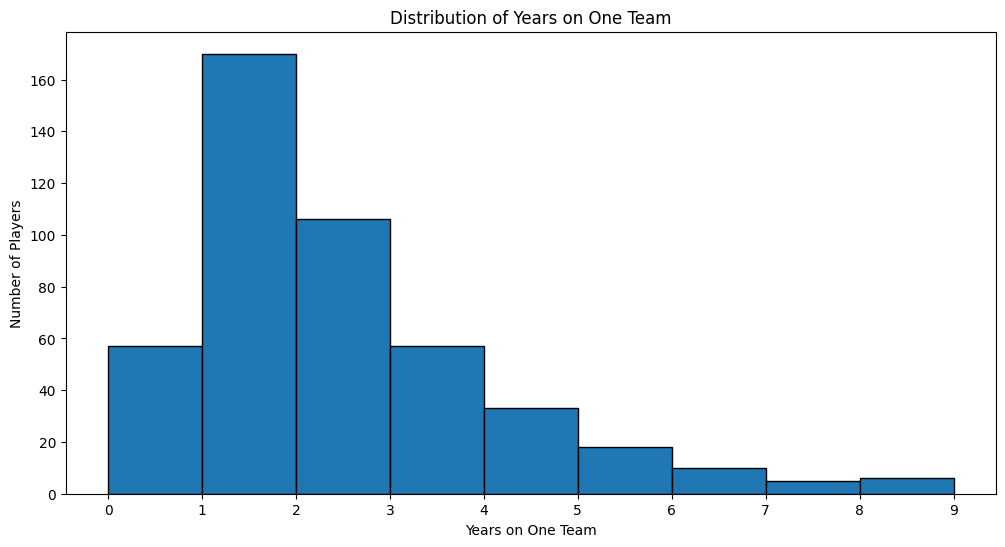

In [23]:
import pandas as pd
import matplotlib.pyplot as plt

# Read your CSV file
df = pd.read_csv("./Dataset/players_teams.csv")

# Sort the DataFrame by player and year
df = df.sort_values(by=['playerID', 'year', 'tmID'])

# Initialize variables to keep track of the current team and player
current_player = ""
current_team = ""
start_year = 0
team_durations = []

# Iterate through the DataFrame to calculate the years on each team
for index, row in df.iterrows():
    player = row['playerID']
    team = row['tmID']
    year = row['year']

    if player != current_player:
        # New player, reset variables
        current_player = player
        current_team = team
        start_year = year
    elif team != current_team:
        # Player changed teams, calculate duration and update current team
        duration = year - start_year
        team_durations.append(duration)
        current_team = team
        start_year = year

# Create a histogram to visualize the distribution of years on one team
plt.figure(figsize=(12, 6))
plt.hist(team_durations, bins=range(min(team_durations), max(team_durations) + 1), edgecolor='k')
plt.xlabel('Years on One Team')
plt.ylabel('Number of Players')
plt.title('Distribution of Years on One Team')
plt.xticks(range(min(team_durations), max(team_durations) + 1))
plt.show()


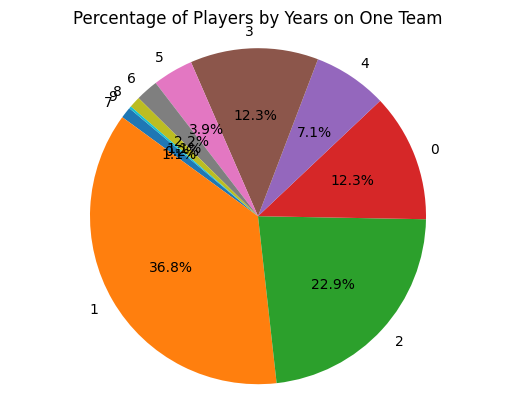

In [28]:
import pandas as pd
import matplotlib.pyplot as plt

# Read your CSV file
df = pd.read_csv("./Dataset/players_teams.csv")

# Sort the DataFrame by player and year
df = df.sort_values(by=['playerID', 'year', 'tmID'])

# Initialize variables to keep track of the current team and player
current_player = ""
current_team = ""
start_year = 0
team_durations = []

# Iterate through the DataFrame to calculate the years on each team
for index, row in df.iterrows():
    player = row['playerID']
    team = row['tmID']
    year = row['year']

    if player != current_player:
        # New player, reset variables
        current_player = player
        current_team = team
        start_year = year
    elif team != current_team:
        # Player changed teams, calculate duration and update current team
        duration = year - start_year
        team_durations.append(duration)
        current_team = team
        start_year = year

# Create a histogram to count the occurrences of years on one team
histogram_data = {}
for duration in team_durations:
    if duration in histogram_data:
        histogram_data[duration] += 1
    else:
        histogram_data[duration] = 1

# Create a pie chart to visualize the percentage of players for each duration
labels = histogram_data.keys()
sizes = [100 * count / len(team_durations) for count in histogram_data.values()]
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140, shadow=False)
plt.axis('equal')  # Equal aspect ratio ensures a circle.

plt.title('Percentage of Players by Years on One Team')
plt.show()
